In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv
from networks import cnn,res_cnn
from eig_plots import plot_eigvec_3d,plot_pairs,plot_eigval,eigdecomp,digit_ind
import torch

In [2]:
train=tv.datasets.MNIST('./mnist_train',train=True,download=True)
data=train.data
labels=train.targets

In [3]:
digits=[0,1]
n_samples=[300,500,800]

In [4]:
cnn3=cnn(3)

In [5]:
U1,S1,V1=eigdecomp(cnn3,digits,300)

In [6]:
U2,S2,V2=eigdecomp(cnn3,digits,500)

In [7]:
U3,S3,V3=eigdecomp(cnn3,digits,800)

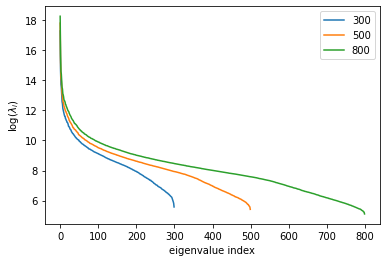

In [8]:
for s in [S1,S2,S3]:
    plt.plot(np.log(s))
plt.ylabel(r'$\log(\lambda_i)$')
plt.xlabel('eigenvalue index')
plt.legend(['300','500','800'])
plt.savefig('./cnn3_3samples_eigval')

In [9]:
def plot2class(eigvec1,eigvec2,ind):
    color=['b','r','g']
    num=[300,500,800]
    plt.scatter(eigvec1[labels[ind]==0],eigvec2[labels[ind]==0],color=color[i],marker='.',label=f'{num[i]}')
    plt.scatter(eigvec1[labels[ind]==1],eigvec2[labels[ind]==1],color=color[i],marker='+')
    plt.legend()

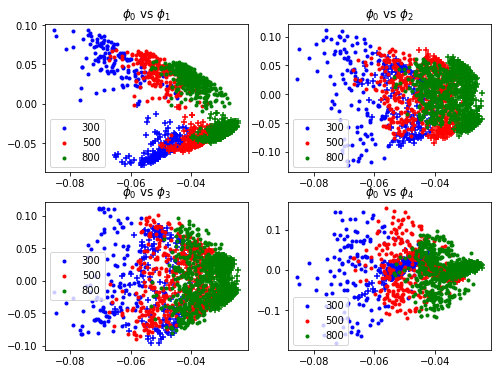

In [10]:
U=[U1,U2,U3]
plt.figure(figsize=(8,6))
for i in range(3):
    ind=digit_ind(digits,n_samples[i],start=0)
    plt.subplot(2,2,1)
    plot2class(U[i][:,0],U[i][:,1],ind)
    plt.title(r'$\phi_0$ vs $\phi_1$')
    plt.subplot(2,2,2)
    plot2class(U[i][:,0],U[i][:,2],ind)
    plt.title(r'$\phi_0$ vs $\phi_2$')
    plt.subplot(2,2,3)
    plot2class(U[i][:,0],U[i][:,3],ind)
    plt.title(r'$\phi_0$ vs $\phi_3$')
    plt.subplot(2,2,4)
    plot2class(U[i][:,0],U[i][:,4],ind)
    plt.title(r'$\phi_0$ vs $\phi_4$')
#plt.savefig('./cnn3_3samples')

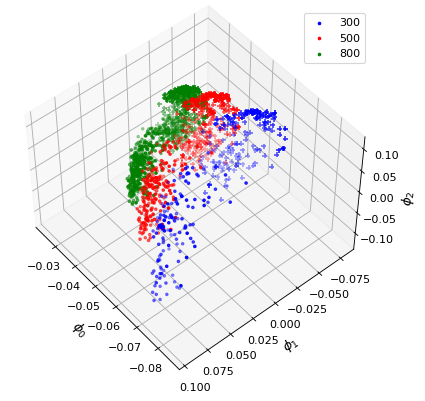

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(6,6),dpi=80)
ax = fig.add_subplot(projection='3d')
marker=['o','+']
color=['b','r','g']
num=[300,500,800]
for i in range(3):  
    ind=digit_ind(digits,n_samples[i],start=0)
    ax.scatter(U[i][:,0][labels[ind]==0],U[i][:,1][labels[ind]==0],U[i][:,2][labels[ind]==0],color=color[i],marker='.',label=f'{num[i]}')
    ax.scatter(U[i][:,0][labels[ind]==1],U[i][:,1][labels[ind]==1],U[i][:,2][labels[ind]==1],color=color[i],marker='+')
ax.set_xlabel(r'$\phi_0$',fontsize=12)
ax.set_ylabel(r'$\phi_1$',fontsize=12)
ax.set_zlabel(r'$\phi_2$',fontsize=12)
ax.view_init(50,140)
plt.legend()
#plt.savefig('./cnn3_3samples_3d')

(-1.0, 800.0, -0.3, 0.3)

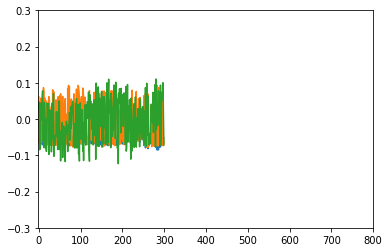

In [17]:
plt.plot(U1[:,:3])
plt.axis([-1,800,-.3,.3])

(-1.0, 800.0, -0.3, 0.3)

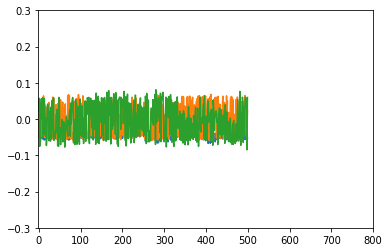

In [18]:
plt.plot(U2[:,:3])
plt.axis([-1,800,-.3,.3])

(-1.0, 800.0, -0.3, 0.3)

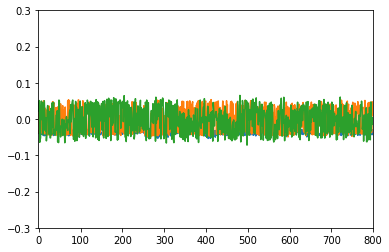

In [19]:
plt.plot(U3[:,:3])
plt.axis([-1,800,-.3,.3])

In [25]:
for i in range(3):
    print(f'eigenvector: {i}')
    for u in [U1,U2,U3]:
        avg=np.mean(u[:,i])
        std=np.std(u[:,i])
        print(f'mean: {avg:.4f}, std: {std:.4f}')

eigenvector: 0
mean: -0.0569, std: 0.0097
mean: -0.0440, std: 0.0079
mean: -0.0348, std: 0.0062
eigenvector: 1
mean: -0.0075, std: 0.0573
mean: -0.0065, std: 0.0442
mean: -0.0052, std: 0.0350
eigenvector: 2
mean: -0.0032, std: 0.0576
mean: -0.0021, std: 0.0447
mean: -0.0014, std: 0.0353
